In [2]:
import numpy as np

from scipy.interpolate import splev, splrep
from scipy.integrate import quad

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib import gridspec
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
plt.style.use("../paper.mplstyle")

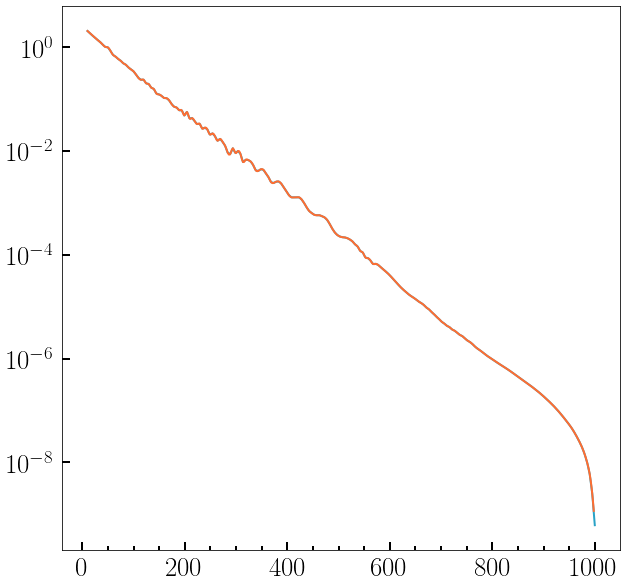

/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:40: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


0.0833613382916


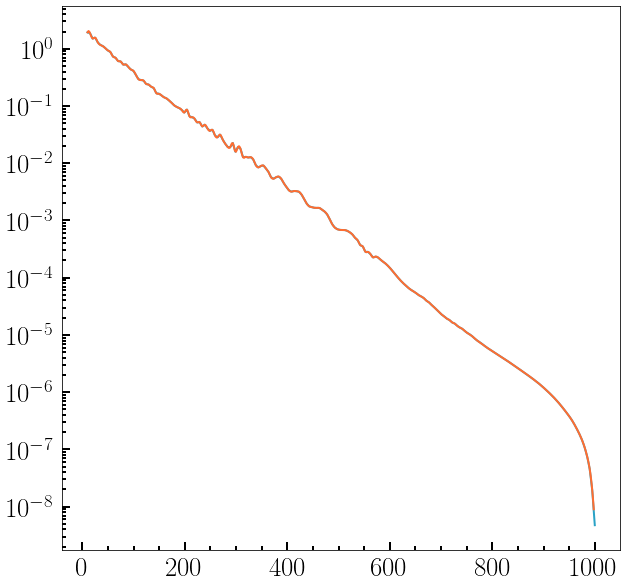

0.15522169917


/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


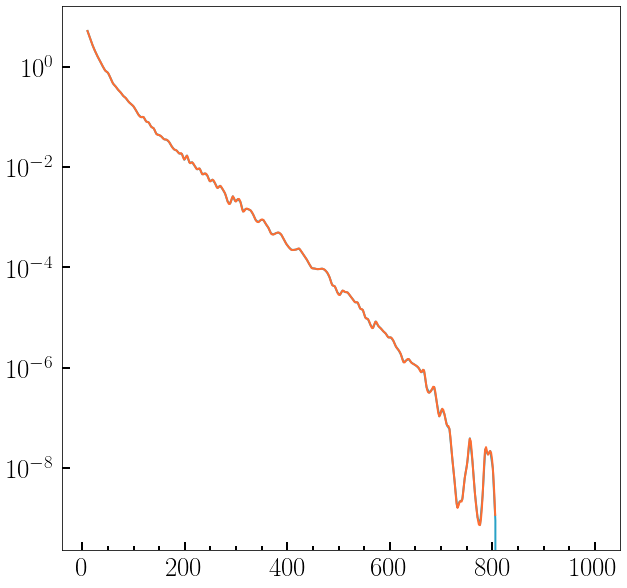

0.0205456969021


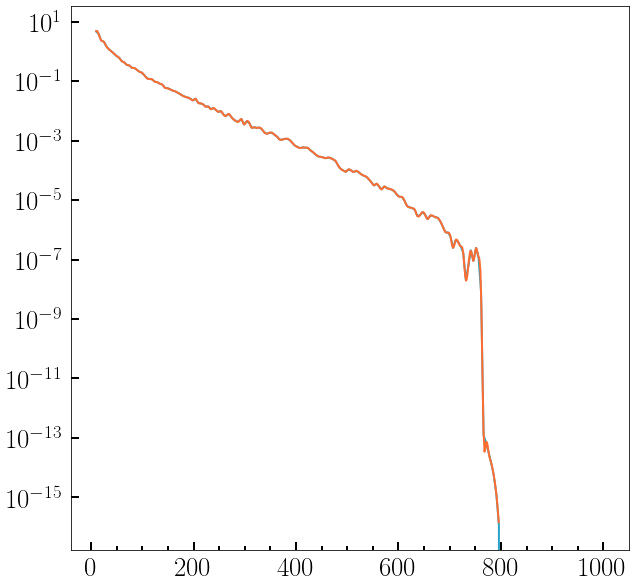

0.0362447936782


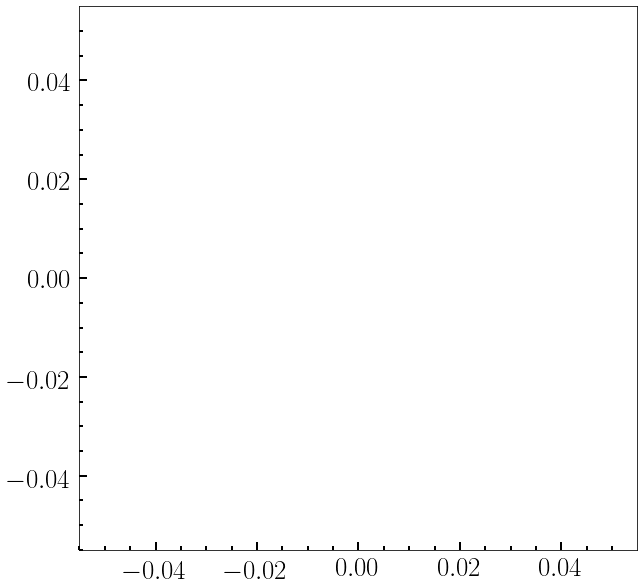

In [3]:
ch = 5
m  = 1000

_ = np.load('/data/user/jlazar/solar_WIMP/data/rate_comparison/ch%d_m%d_rate_comp.npy' % (ch, m))
tcks = []
ee      = np.linspace(10, m, 200)
ee_fine = np.linspace(10, m, 500)

def get_flux(e, tck):
    return np.exp(splev(e, tck))

e_edges     = np.logspace(2,6,21)
e_widths    = e_edges[1:]-e_edges[:-1]
e_cents     = (e_edges[1:]+e_edges[:-1])/2
effa = np.load('../data/MEOWS_effa_w_abs.npy')[5]*1e-4
effa_tck = splrep(np.log(e_cents), np.log(effa))

def get_effa(e):
    return np.exp(splev(np.log(e), effa_tck))

def func(e, emin, emax, tck):
    if e<emin or e>emax:
        return 0
    else:
        return get_flux(e, tck) * get_effa(e)

for dist in _:
    ldist_isfinite = np.where(np.isfinite(np.log(dist)))
    tck = splrep(ee[ldist_isfinite], np.log(dist)[ldist_isfinite])
    plt.plot(ee, dist)
    blahblah = ee_fine[np.where(ee_fine<ee[ldist_isfinite][-1])[0]]
    plt.plot(blahblah, [get_flux(e, tck) for e in blahblah])
    plt.semilogy()
    plt.show()
    plt.plot()
#     plt.plot(blahblah, [func(e, blahblah[-1], tck) for e in blahblah])
#     plt.semilogy()
#     plt.show()
    f = lambda le: np.exp(le)*func(np.exp(le), e_cents[0], blahblah[-1], tck)
    I = quad(f, np.log(100), np.log(m))
    print(I[0])

(5, 500)
(8.27755058859775e-05, 1.0950189642742179e-08)


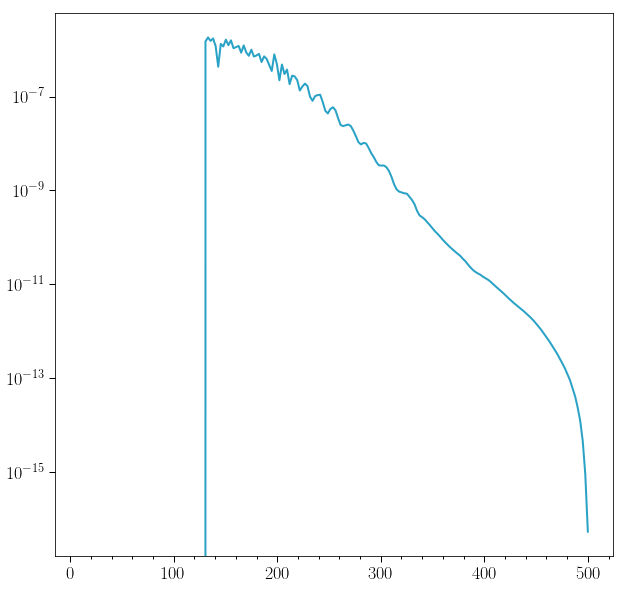

(5, 1000)
(0.003933388414362227, 2.6130699794459436e-05)


/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


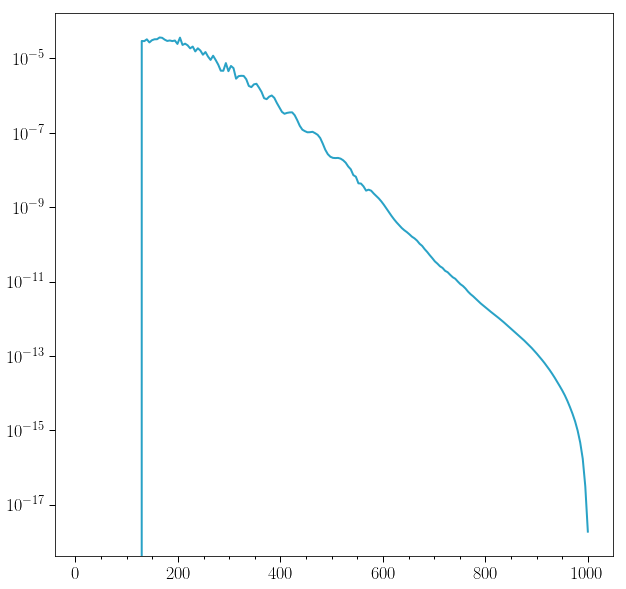

(5, 5000)
(0.6053830923440784, 0.000431045512827688)


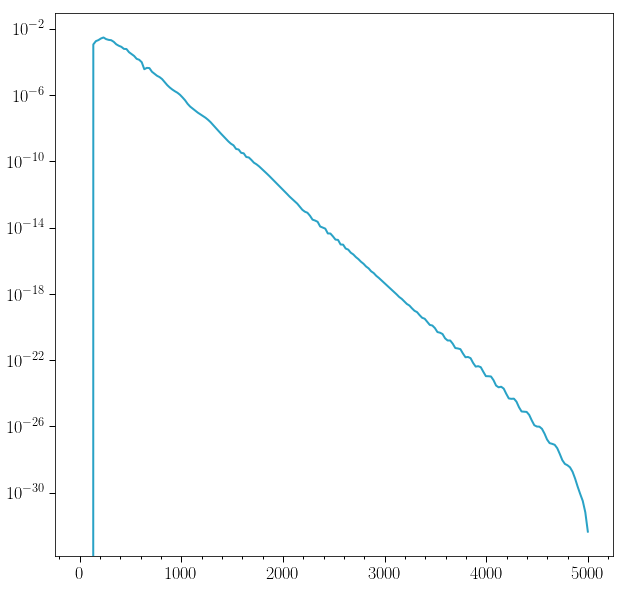

(5, 10000)
(2.3653085592131418, 2.4031585958095292e-05)


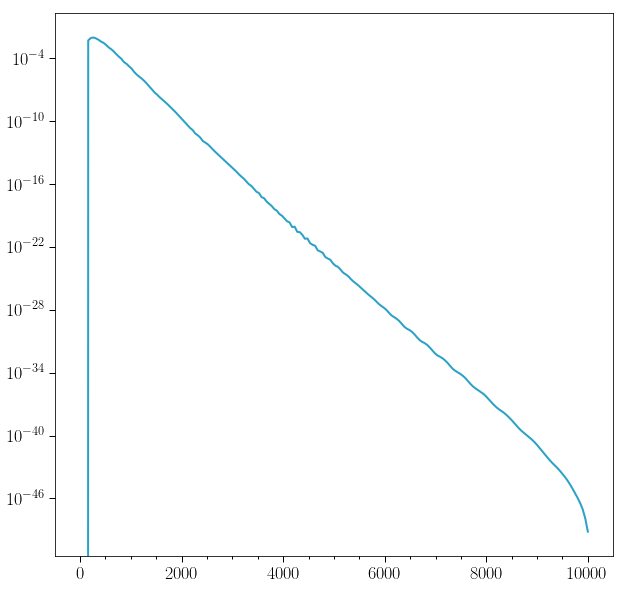

(8, 500)
(0.008143881549453802, 9.471619913104744e-06)


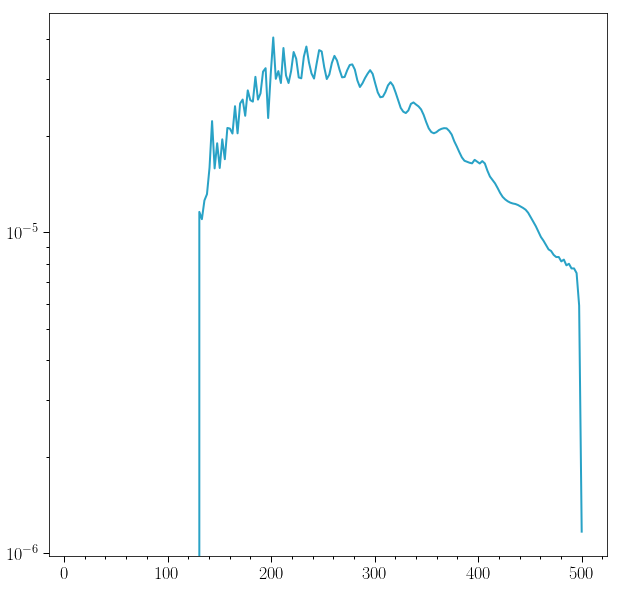

(8, 1000)
(0.03268280273641887, 3.732656650013345e-05)


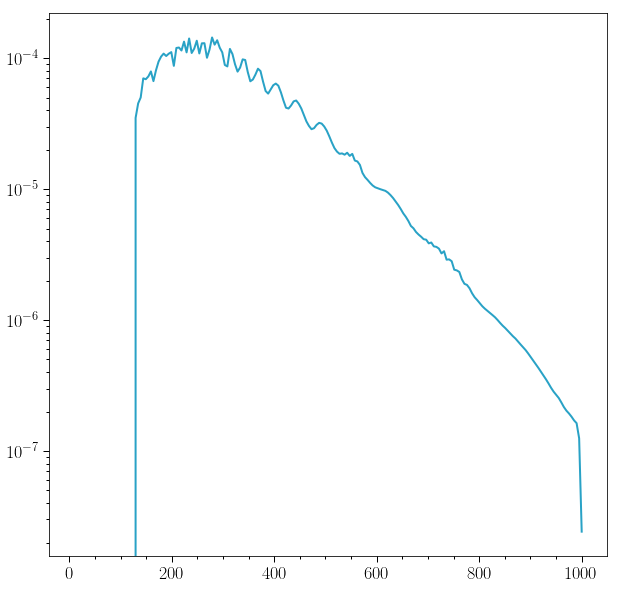

(8, 5000)
(1.0167629548921835, 0.0005956219170564214)


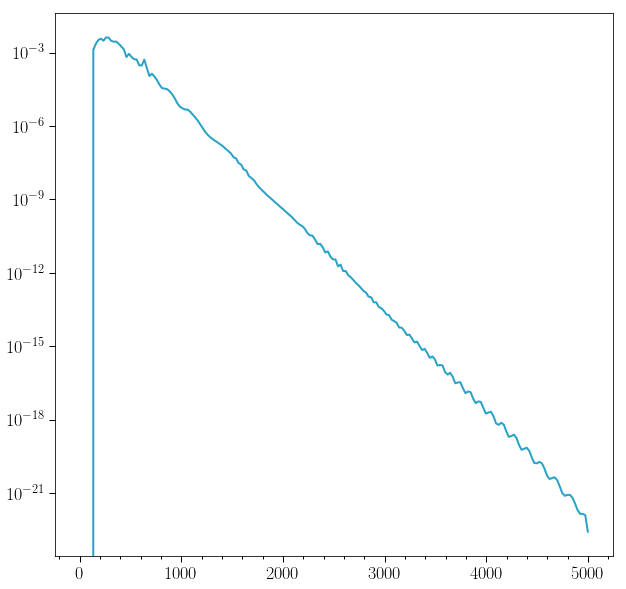

(8, 10000)
(4.321679460900358, 0.00369819987072576)


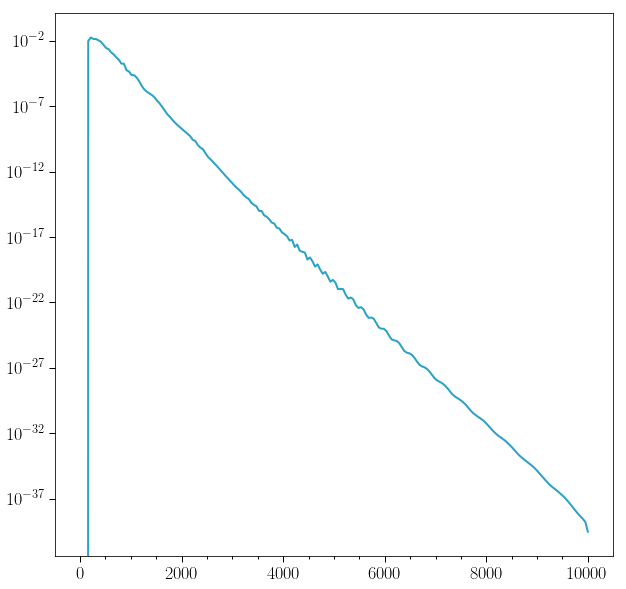

(11, 500)
(0.07980884753165632, 0.0001740659407131489)


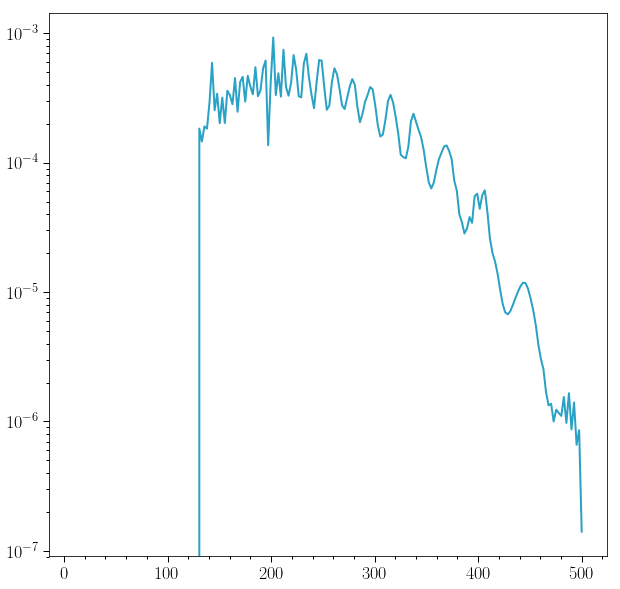

(11, 1000)
(0.4917413180030709, 0.0005002756671560894)


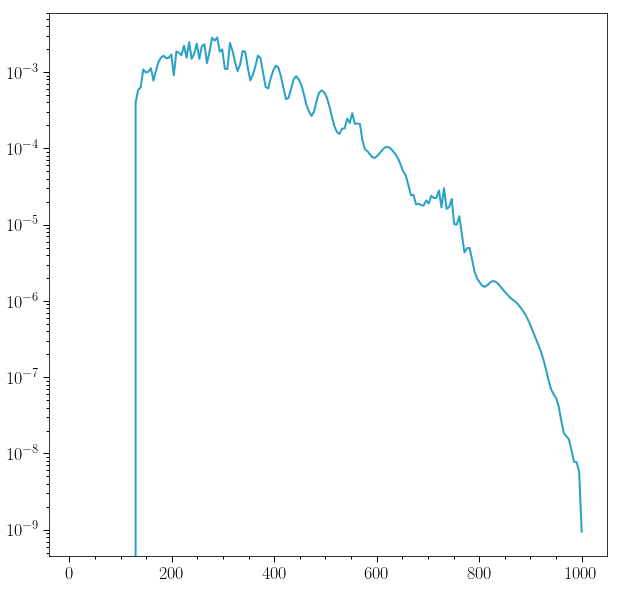

(11, 5000)
(13.817105593365133, 0.005461839655833245)


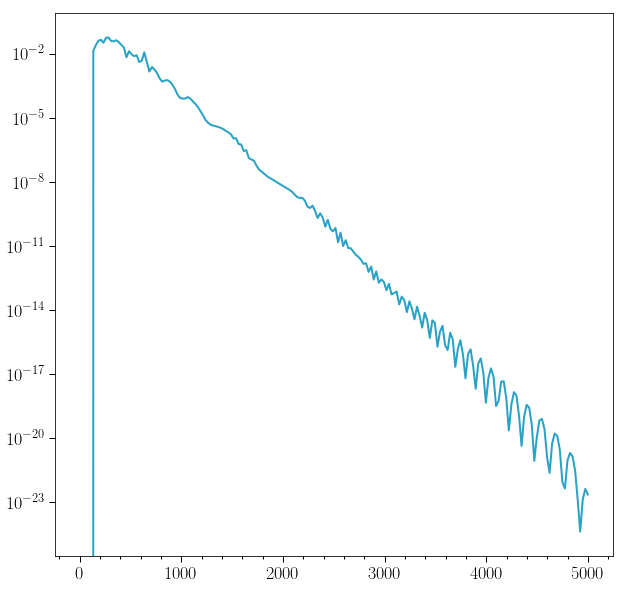

(11, 10000)
(50.38273994927154, 0.04435449718666543)


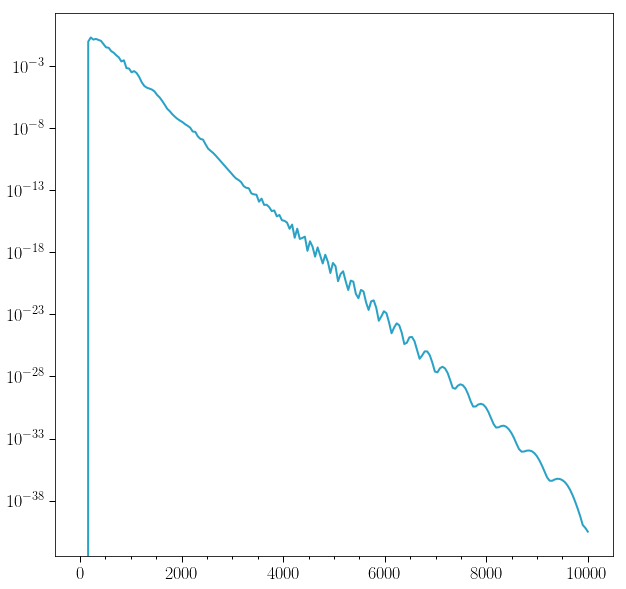

In [39]:
effa_3y    = np.genfromtxt('../data/3y_eff_area.csv', delimiter=',').T
effa_meows = np.vstack([e_cents, effa])

effa_3y_tck    = splrep(np.log(effa_3y[0]), np.log(effa_3y[1]))
effa_meows_tck = splrep(np.log(effa_meows[0]), np.log(effa_meows[1]))

def get_effa(e, tck):
    return np.exp(splev(np.log(e), tck))

def get_flux(e, tck):
    return np.exp(splev(e, tck))

def flux_times_effa(e, emin, emax, effa_tck, fl_tck):
    if e<emin or e>emax:
        return 0
    else:
        return get_effa(e, effa_tck)*get_flux(e, fl_tck)

for ch in [5,8,11]:
    for m in [500,1000,5000,10000]:
        print(ch,m)
        ee      = np.linspace(10, m, 200)
        ee_fine = np.linspace(10, m, 500)

        flux = np.load('/data/user/jlazar/solar_WIMP/data/rate_comparison/ch%d_m%d_rate_comp.npy' % (ch, m))
        lnew_flux = np.log(flux[0]*flux[1])
#         lold_flux = np.log(flux[2]*flux[3])
        new_isfinite = np.where(np.isfinite(lnew_flux))[0]
#         old_isfinite = np.where(np.isfinite(lold_flux))[0]
        new_tck      = splrep(ee[new_isfinite], lnew_flux[new_isfinite])
#         old_tck      = splrep(ee[old_isfinite], lold_flux[old_isfinite])
        new_func = lambda le: np.exp(le)*flux_times_effa(np.exp(le), e_cents[0], ee[new_isfinite][-1], effa_meows_tck, new_tck)
#         old_func = lambda le: np.exp(le)*flux_times_effa(np.exp(le), 100,        ee[old_isfinite][-1], effa_meows_tck, old_tck)
        I_new = quad(new_func, np.log(100), np.log(m))
#         I_old = quad(old_func, np.log(10), np.log(m))
        print(I_new)
#         print(I_old)
        
        plt.plot(ee[new_isfinite], [flux_times_effa(e, e_cents[0], ee[new_isfinite][-1], effa_meows_tck, new_tck) for e in ee[new_isfinite]])
#         plt.plot(ee[old_isfinite], [flux_times_effa(e, 100       , ee[old_isfinite][-1], effa_meows_tck, old_tck) for e in ee[old_isfinite]])
        plt.semilogy()
        plt.show()

In [40]:
class RateComparateur:
    
    def __init__(self, ch, m):
        
        ee = np.linspace(10./m, m, 200)
        
        self._flux = np.load('/data/user/jlazar/solar_WIMP/data/rate_comparison/ch%d_m%d_rate_comp.npy' % (ch, m))
        self.brw_nu    = self._flux[0]
        self.brw_nubar = self._flux[1]
        self.pyt_nu    = self._flux[2]
        self.pyt_nubar = self._flux[3]
        
        self.brw_tot   = self.brw_nu+self.brw_nubar
        self.pyt_tot   = self.pyt_nu+self.pyt_nubar
        
        self._brw_tot_isfinite = np.where(self.brw_tot!=0)[0]
        self._pyt_tot_isfinite = np.where(self.pyt_tot!=0)[0]
        self.brw_tot_fin       = self.brw_tot[self._brw_tot_isfinite]
        self.pyt_tot_fin       = self.pyt_tot[self._pyt_tot_isfinite]
        
        
        self._brw_tck = splrep(ee[self._brw_tot_isfinite], np.log(self.brw_tot)[self._brw_tot_isfinite])
        self._pyt_tck = splrep(ee[self._pyt_tot_isfinite], np.log(self.pyt_tot)[self._pyt_tot_isfinite])
        
        self._effa_meows = np.load('../data/MEOWS_effa_w_abs.npy')[5]
        self._effa_3y    = np.genfromtxt('../data/3y_eff_area.csv', delimiter=',')[:, 1]
        
        self._effa_meows_tck = splrep(np.log(e_cents), np.log(self._effa_meows))
        self._effa_meows_tck = splrep(np.log(np.genfromtxt('../data/3y_eff_area.csv', delimiter=',')[:, 0]), np.log(self._effa_3y))
        
    def get_effa(self, e, effa_tck):
        return np.exp(splev(np.log(e), effa_tck))
    
    def get_flux(self, e, fl_tck):
        return np.exp(splev(e, fl_tck))
    
    def flux_times_effa(self, e, effa_tck, fl_tck):
        return get_effa(e, effa_tck)*get_flux(e, fl_tck)

In [41]:
comp = RateComparateur(5,1000)

/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


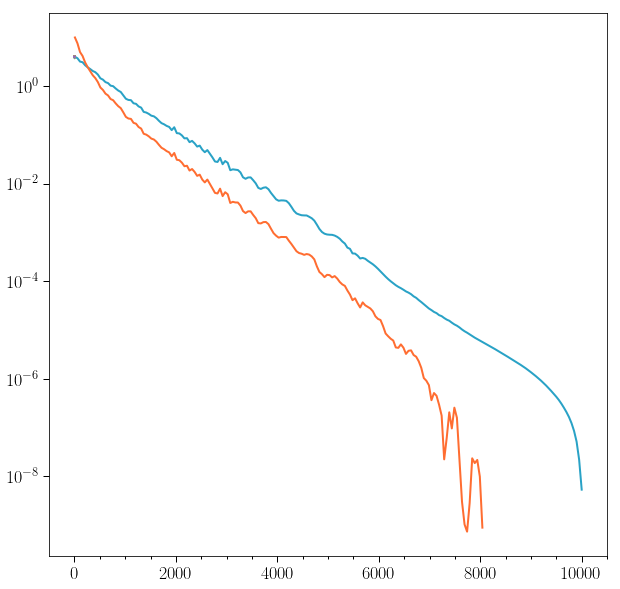

In [42]:
plt.plot(ee[comp._brw_tot_isfinite], comp.brw_tot_fin)
plt.plot(ee[comp._pyt_tot_isfinite], comp.pyt_tot_fin)
# _ = ee_fine[np.where(ee_fine<ee[comp._brw_tot_isfinite][-1])[0]]
plt.plot(_, [comp.get_flux(e, comp._brw_tck) for e in _])
_ = ee_fine[np.where(ee_fine<ee[comp._pyt_tot_isfinite][-1])[0]]
# plt.plot(_, [comp.get_flux(e, comp._pyt_tck) for e in _])
plt.semilogy()
plt.show()

In [18]:
ch = 5
m  = 1000

factors = {5:{}, 8:{}, 11:{}}
for ch in [5,8,11]:
    for m in [300,500,800,1000,3000,5000,8000,10000]:
        flux = np.load('/data/user/jlazar/solar_WIMP/data/rate_comparison/ch%d_m%d_rate_comp.npy' % (ch, m))
        brw_flux = flux[0]+flux[1]
        pyt_flux = flux[2]+flux[3]

        lbrw_flux = np.log(brw_flux)
        lpyt_flux = np.log(pyt_flux)

        lbrw_isfinite = np.where(np.isfinite(lbrw_flux))[0]
        lpyt_isfinite = np.where(np.isfinite(lpyt_flux))[0]

        tcks = []
        ee      = np.linspace(10, m, 200)
        ee_fine = np.linspace(10, m, 500)

        brw_ee = ee[lbrw_isfinite]
        pyt_ee = ee[lpyt_isfinite]
        brw_tck = splrep(ee[lbrw_isfinite], lbrw_flux[lbrw_isfinite])
        pyt_tck = splrep(pyt_ee, lpyt_flux[lpyt_isfinite])

        def get_brw_flux(e):
            if e<brw_ee[0] or e>brw_ee[-1]:
                return 0
            else:
                return np.exp(splev(e, brw_tck))

        def get_pyt_flux(e):
            if e<pyt_ee[0] or e>pyt_ee[-1]:
                return 0
            else:
                return np.exp(splev(e, pyt_tck))

        e_edges        = np.logspace(2,6,21)
        e_widths       = e_edges[1:]-e_edges[:-1]
        e_cents        = (e_edges[1:]+e_edges[:-1])/2
        MEOWS_effa     = np.load('../data/MEOWS_effa_w_abs.npy')[5]*1e-4
        MEOWS_effa_tck = splrep(np.log(e_cents), np.log(MEOWS_effa))
        old_effa       = np.genfromtxt('../data/3y_eff_area.csv', delimiter=',').T
        old_effa_tck   = splrep(np.log(old_effa[0]), np.log(old_effa[1]))

        def get_MEOWS_effa(e):
            return np.exp(splev(np.log(e), MEOWS_effa_tck))

        def get_old_effa(e):
            return np.exp(splev(np.log(e), old_effa_tck))
        def get_new_product(e):
            return get_MEOWS_effa(e) * get_brw_flux(e)

        def get_old_product(e):
            return get_old_effa(e) * get_pyt_flux(e)


        func_new = lambda le: np.exp(le)*get_new_product(np.exp(le))
        func_old = lambda le: np.exp(le)*get_old_product(np.exp(le))

        I_new = quad(func_new, np.log(100), np.log(m))
        I_old = quad(func_old, np.log(60), np.log(m))
                
        factors[ch][m] = I_new[0] / I_old[0]
print(factors[5][500])

/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:61: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:62: IntegrationWarning: The maximum number of subdivisions (50) has b

0.496320529829


/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log


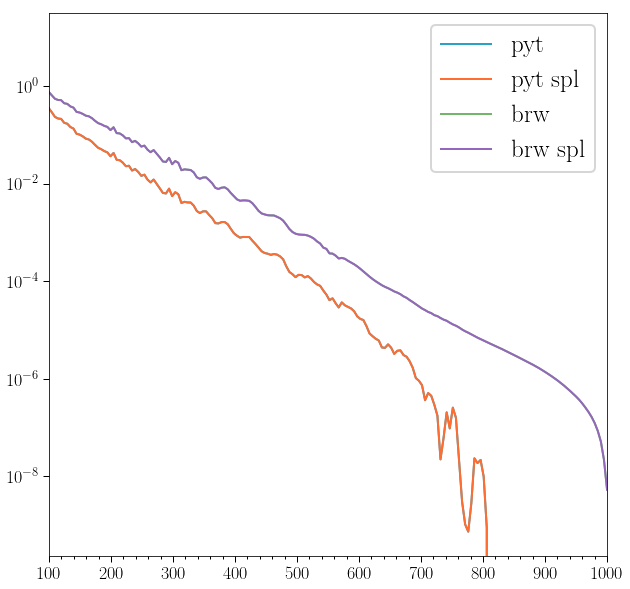

In [28]:
ch, m = 5, 1000

flux = np.load('/data/user/jlazar/solar_WIMP/data/rate_comparison/ch%d_m%d_rate_comp.npy' % (ch, m))

brw_flux = flux[0]+flux[1]
pyt_flux = flux[2]+flux[3]

lbrw_isfinite = np.where(np.isfinite(lbrw_flux))[0]
lpyt_isfinite = np.where(np.isfinite(lpyt_flux))[0]

tcks = []
ee      = np.linspace(10, m, 200)
ee_fine = np.linspace(10, m, 500)

brw_ee = ee[lbrw_isfinite]
pyt_ee = ee[lpyt_isfinite]
brw_tck = splrep(ee[lbrw_isfinite], lbrw_flux[lbrw_isfinite])
pyt_tck = splrep(pyt_ee, lpyt_flux[lpyt_isfinite])

def get_brw_flux(e):
    if e<brw_ee[0] or e>brw_ee[-1]:
        return 0
    else:
        return np.exp(splev(e, brw_tck))

def get_pyt_flux(e):
    if e<pyt_ee[0] or e>pyt_ee[-1]:
        return 0
    else:
        return np.exp(splev(e, pyt_tck))

lbrw_flux = np.log(brw_flux)
lpyt_flux = np.log(pyt_flux)

plt.plot(ee, np.exp(lpyt_flux), label='pyt')
plt.plot(ee, [get_pyt_flux(e) for e in ee], label='pyt spl')
plt.plot(ee, np.exp(lbrw_flux), label='brw')
plt.plot(ee, [get_brw_flux(e) for e in ee], label='brw spl')
plt.semilogy()
plt.legend()
plt.xlim(100, m)
plt.show()

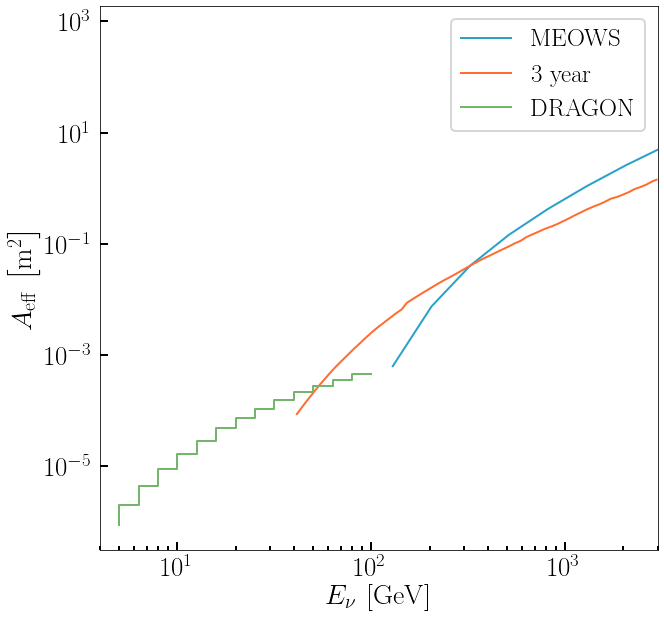

In [13]:
le_effa = np.genfromtxt('../data/dragon_w_rde.csv', delimiter=',').T

plt.plot(e_cents, MEOWS_effa, label='MEOWS')
# plt.plot(e_cents, [get_MEOWS_effa(e) for e in e_cents], label='current')
plt.plot(old_effa[0], old_effa[1], label='3 year')
plt.step(np.power(10, le_effa[0]), le_effa[1], where='pre', label='DRAGON')
# plt.plot(old_effa[0], [get_old_effa(e) for e in old_effa[0]], label='3yr')
plt.loglog()
plt.xlim(10**0.6, 3e3)
# plt.ylim(1e-4,10)
plt.legend()
plt.xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$')
plt.ylabel(r'$A_{\rm{eff}}\,\left[\rm{m}^{2}\right]$')
plt.show()

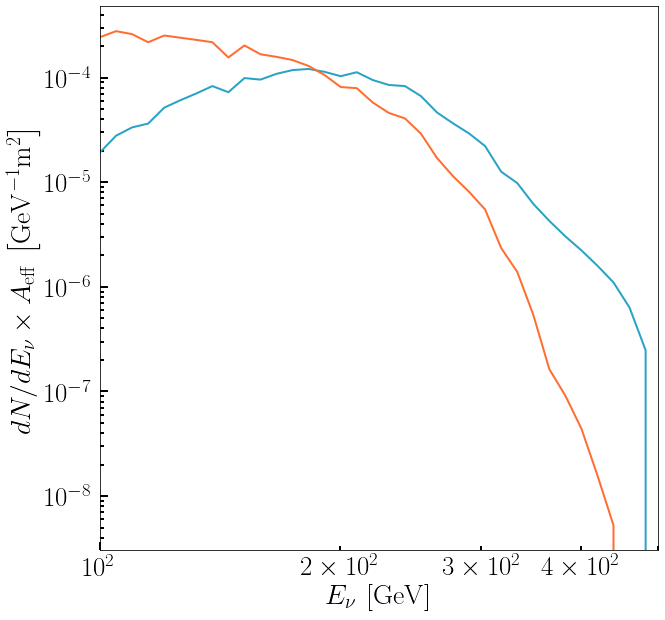

In [5]:
ee_2plot = np.logspace(2,6, 200)
def get_new_product(e):
    return get_MEOWS_effa(e) * get_brw_flux(e)

def get_old_product(e):
    return get_old_effa(e) * get_pyt_flux(e)

plt.plot(ee_2plot, [get_new_product(e) for e in ee_2plot])
plt.plot(ee_2plot, [get_old_product(e) for e in ee_2plot])
plt.loglog()
plt.xlim(100, m)
# plt.ylim(1e-7, 5)
plt.xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$')
plt.ylabel(r'$dN/dE_{\nu}\times A_{\rm{eff}}\,\left[\rm{GeV}^{-1}\rm{m}^{2}\right]$')
plt.show()

In [34]:
func_new = lambda le: np.exp(le)*get_new_product(np.exp(le))
func_old = lambda le: np.exp(le)*get_old_product(np.exp(le))

I_new = quad(func_new, np.log(100), np.log(m))
I_old = quad(func_old, np.log(100), np.log(m))
print(I_new[0] / I_old[0])

1.8497516232


/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  after removing the cwd from sys.path.
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval an

In [19]:
atm_flux = np.genfromtxt('../data/AIRS_flux_sib_HG.dat')

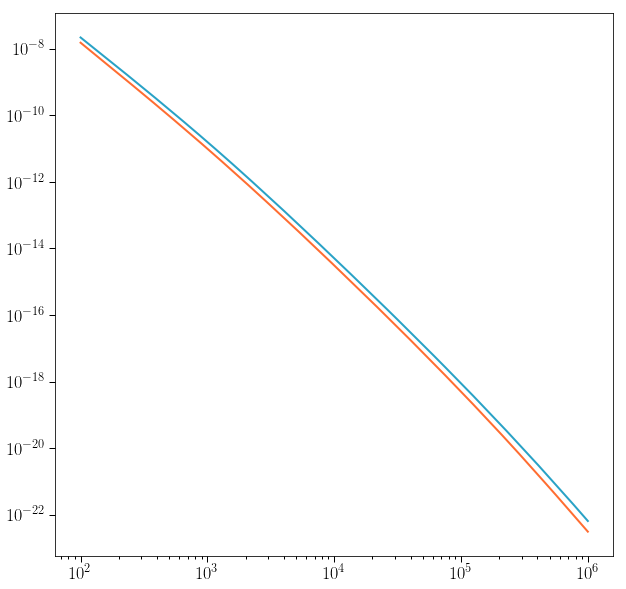

In [20]:
plt.plot(atm_flux[:,1][:350], atm_flux[:,-2][:350])
plt.plot(atm_flux[:,1][:350], atm_flux[:,-1][:350])
plt.loglog()
plt.show()

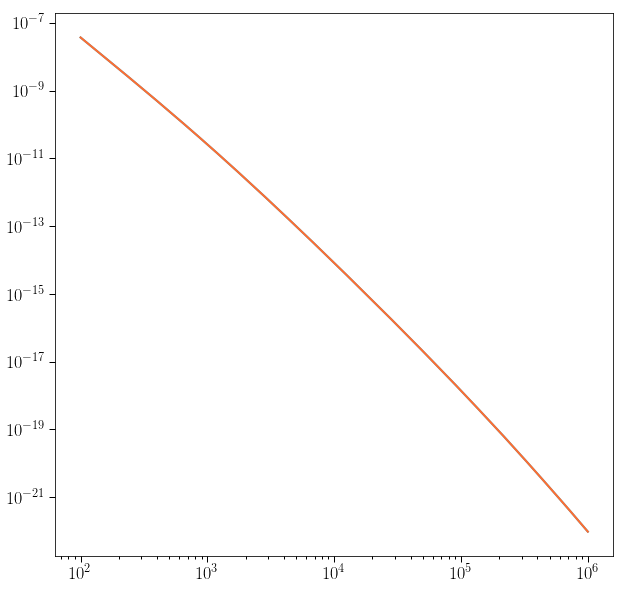

In [25]:
tot_atm_numu = atm_flux[:,-2][:350]+atm_flux[:,-1][:350]
atm_tck      = splrep(np.log(atm_flux[:,1][:350]), np.log(tot_atm_numu))
plt.plot(atm_flux[:,1][:350], tot_atm_numu)
plt.plot(atm_flux[:,1][:350], [np.exp(splev(np.log(e), atm_tck)) for e in atm_flux[:,1][:350]])
plt.loglog()
plt.show()
def get_MEOWS_atm_prod(e):
    return get_MEOWS_effa(e)* np.exp(splev(np.log(e), atm_tck))
def get_3y_atm_prod(e):
    return get_old_effa(e) * np.exp(splev(np.log(e), atm_tck))

In [36]:
f_old = lambda le: np.exp(le)*get_3y_atm_prod(np.exp(le))
f_new = lambda le: np.exp(le)*get_MEOWS_atm_prod(np.exp(le))
I_old = quad(f_old, np.log(60), np.log(1000))
I_new = quad(f_new, np.log(100), np.log(1000))
print(I_old)
print(I_new)

(2.9267070916012133e-08, 6.008783313160327e-09)
(2.4565335658819318e-08, 8.809026399674347e-10)


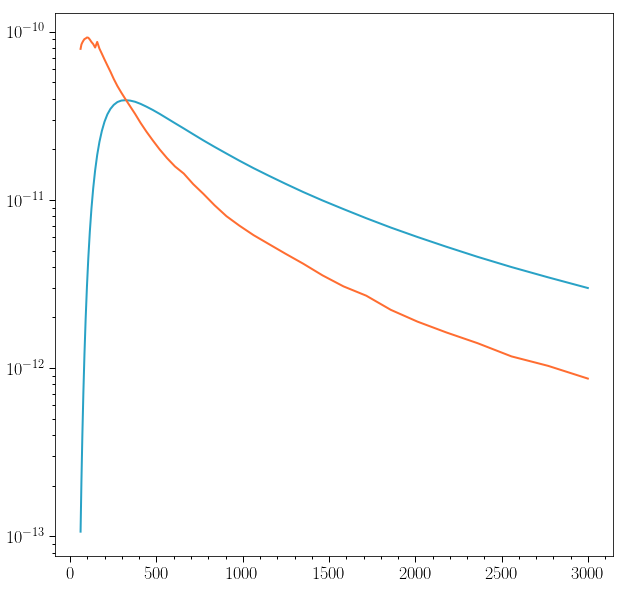

In [35]:
ee = np.logspace(np.log10(60), np.log10(3000))
plt.plot(ee, [get_MEOWS_atm_prod(e) for e in ee])
plt.plot(ee, [get_3y_atm_prod(e) for e in ee])
plt.semilogy()
plt.show()

In [23]:
def get_rescale_prod(e):
    return get_brw_flux(e) * get_old_effa(e)
factors = {5:{}, 8:{}, 11:{}}
for ch in [5,8,11]:
    for m in [500,1000,5000,10000]:
        flux = np.load('/data/user/jlazar/solar_WIMP/data/rate_comparison/ch%d_m%d_rate_comp.npy' % (ch, m))
        brw_flux = flux[0]+flux[1]
        pyt_flux = flux[2]+flux[3]

        lbrw_flux = np.log(brw_flux)
        lpyt_flux = np.log(pyt_flux)

        lbrw_isfinite = np.where(np.isfinite(lbrw_flux))[0]
        lpyt_isfinite = np.where(np.isfinite(lpyt_flux))[0]

        tcks = []
        ee      = np.linspace(10, m, 200)
        ee_fine = np.linspace(10, m, 500)

        brw_ee = ee[lbrw_isfinite]
        pyt_ee = ee[lpyt_isfinite]
        brw_tck = splrep(ee[lbrw_isfinite], lbrw_flux[lbrw_isfinite])
        pyt_tck = splrep(pyt_ee, lpyt_flux[lpyt_isfinite])

        def get_brw_flux(e):
            if e<brw_ee[0] or e>brw_ee[-1]:
                return 0
            else:
                return np.exp(splev(e, brw_tck))

        def get_pyt_flux(e):
            if e<pyt_ee[0] or e>pyt_ee[-1]:
                return 0
            else:
                return np.exp(splev(e, pyt_tck))

        e_edges     = np.logspace(2,6,21)
        e_widths    = e_edges[1:]-e_edges[:-1]
        e_cents     = (e_edges[1:]+e_edges[:-1])/2
        MEOWS_effa = np.load('../data/MEOWS_effa_w_abs.npy')[5]*1e-4
        MEOWS_effa_tck = splrep(np.log(e_cents), np.log(MEOWS_effa))
        old_effa       = np.genfromtxt('../data/3y_eff_area.csv', delimiter=',').T
        old_effa_tck = splrep(np.log(old_effa[0]), np.log(old_effa[1]))

        
        
        def get_MEOWS_effa(e):
            return np.exp(splev(np.log(e), MEOWS_effa_tck))

        def get_old_effa(e):
            return np.exp(splev(np.log(e), old_effa_tck))
        
        def get_rescale_prod(e):
            return get_brw_flux(e) * get_old_effa(e)
        
        func_rescale = lambda le: np.exp(le)*get_rescale_prod(np.exp(le))
        func_old = lambda le: np.exp(le)*get_old_product(np.exp(le))

        I_res = quad(func_rescale, np.log(60), np.log(m))
        I_old = quad(func_old, np.log(60), np.log(m))
        print(I_res[0]/I_old[0])

/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:59: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:60: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If 

2.32158047754
3.15072938087
7.61307965898
4.68944089026


/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


0.973303720342
0.973418758776
1.10927063471
1.20789407877
0.988683497814
0.987367488954
0.986996237898
0.991200222741


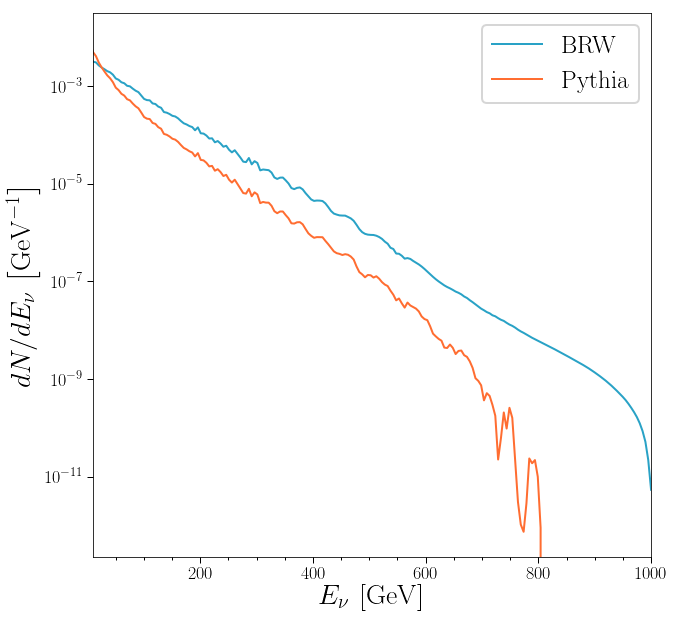

In [45]:
f = np.load('../data/rate_comparison/ch5_m1000_rate_comp.npy')
ee = np.linspace(10./1000, 1000, 200)
plt.plot(ee, (f[0]+f[1])/1000., label=r'BRW')
plt.plot(ee, (f[2]+f[3])/1000., label='Pythia')
plt.legend()
plt.semilogy()
plt.xlim(10, 1000)
plt.xlabel(r'$E_{\nu}\,\left[\rm{GeV}\right]$')
plt.ylabel(r'$dN/dE_{\nu}\,\left[\rm{GeV}^{-1}\right]$')
plt.show()

ImportError: No module named solar_position_calc